In [27]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

# Create a plucky digital harp sound
# Harps have bright harmonics with specific ratios
def harp_wave(t, freq, num_harmonics=4):
    """Generate a harp-like wave with fewer harmonics for a duller sound"""
    wave = np.zeros_like(t)
    
    # Reduced harmonics for a duller, warmer sound
    # Strong fundamental, then quickly decreasing harmonics
    harmonic_amplitudes = [1.0, 0.4, 0.2, 0.1]
    
    for n in range(1, min(num_harmonics + 1, len(harmonic_amplitudes) + 1)):
        amplitude = harmonic_amplitudes[n - 1] if n <= len(harmonic_amplitudes) else 1.0 / n
        # Add slight phase variation for more natural sound (fixed per harmonic)
        phase = 0.05 * (n - 1)  # Small phase offset that varies by harmonic
        wave += amplitude * np.sin(2 * np.pi * n * freq * t + phase)
    
    return wave

# Create a very percussive envelope: instant attack, very fast decay
def percussive_envelope(t, attack_samples=1, decay_time=0.08):
    """Create a percussive envelope with instant attack and very fast exponential decay"""
    envelope = np.zeros_like(t)
    
    # Instant attack (1 sample = almost no attack time)
    envelope[:attack_samples] = 1.0
    
    # Very fast exponential decay for percussive feel
    decay_start = attack_samples
    decay_t = t[decay_start:] - t[decay_start]
    # Exponential decay: e^(-t/τ) where τ controls decay rate
    tau = decay_time  # Time constant - smaller = faster decay
    envelope[decay_start:] = np.exp(-decay_t / tau)
    
    return envelope

def visualize_wave(wave, sample_rate, title="Waveform", max_samples=10000):
    """Visualize the audio waveform"""
    # Downsample for visualization if signal is too long
    if len(wave) > max_samples:
        step = len(wave) // max_samples
        wave_vis = wave[::step]
        t_vis = np.arange(len(wave_vis)) / sample_rate * step
    else:
        wave_vis = wave
        t_vis = np.arange(len(wave_vis)) / sample_rate
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Full waveform
    ax1.plot(t_vis, wave_vis, linewidth=0.5)
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('Amplitude')
    ax1.set_title(f'{title} - Full Waveform')
    ax1.grid(True, alpha=0.3)
    
    # Zoomed in view (first 0.1 seconds)
    zoom_samples = min(int(0.1 * sample_rate), len(wave))
    t_zoom = np.arange(zoom_samples) / sample_rate
    ax2.plot(t_zoom, wave[:zoom_samples], linewidth=0.5)
    ax2.set_xlabel('Time (seconds)')
    ax2.set_ylabel('Amplitude')
    ax2.set_title(f'{title} - First 0.1 seconds (zoomed)')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print some statistics
    print(f"Duration: {len(wave) / sample_rate:.3f} seconds")
    print(f"Sample rate: {sample_rate} Hz")
    print(f"Max amplitude: {np.max(np.abs(wave)):.4f}")
    print(f"RMS amplitude: {np.sqrt(np.mean(wave**2)):.4f}")

In [28]:
sample_rate = 44100
duration = 0.3  # seconds - shorter for more percussive sound
frequency = 261.63  # C4 (middle C)

t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate the base harp wave (fewer harmonics for duller sound)
harp = harp_wave(t, frequency, num_harmonics=4)

# Apply very percussive envelope
envelope = percussive_envelope(t, attack_samples=1, decay_time=0.06)

# Reduced detuning for a duller, less metallic sound (maintain dullness)
detune_amount = 0.001  # 0.1% detuning (reduced from 0.3%)
harp_detuned = harp_wave(t, frequency * (1 + detune_amount), num_harmonics=4)
harp_detuned2 = harp_wave(t, frequency * (1 - detune_amount), num_harmonics=4)

# Mix original with slightly detuned versions (less chorus for duller sound)
wave = 0.7 * harp + 0.2 * harp_detuned + 0.1 * harp_detuned2

# Add a subtle percussive transient (brief click/pop) at the start for more impact
transient_samples = int(0.001 * sample_rate)  # 1ms transient
if transient_samples > 0:
    # Create a brief high-frequency click using a short burst of noise
    transient = np.random.normal(0, 0.15, transient_samples)
    # Apply a quick fade to the transient
    transient_fade = np.linspace(1, 0, transient_samples)
    transient = transient * transient_fade
    # Add to the beginning of the wave
    wave[:transient_samples] += transient

# Apply envelope
wave = wave * envelope

# Normalize and scale
wave = wave / np.max(np.abs(wave)) * 0.3

sf.write("sounds/testtone.wav", wave, sample_rate)

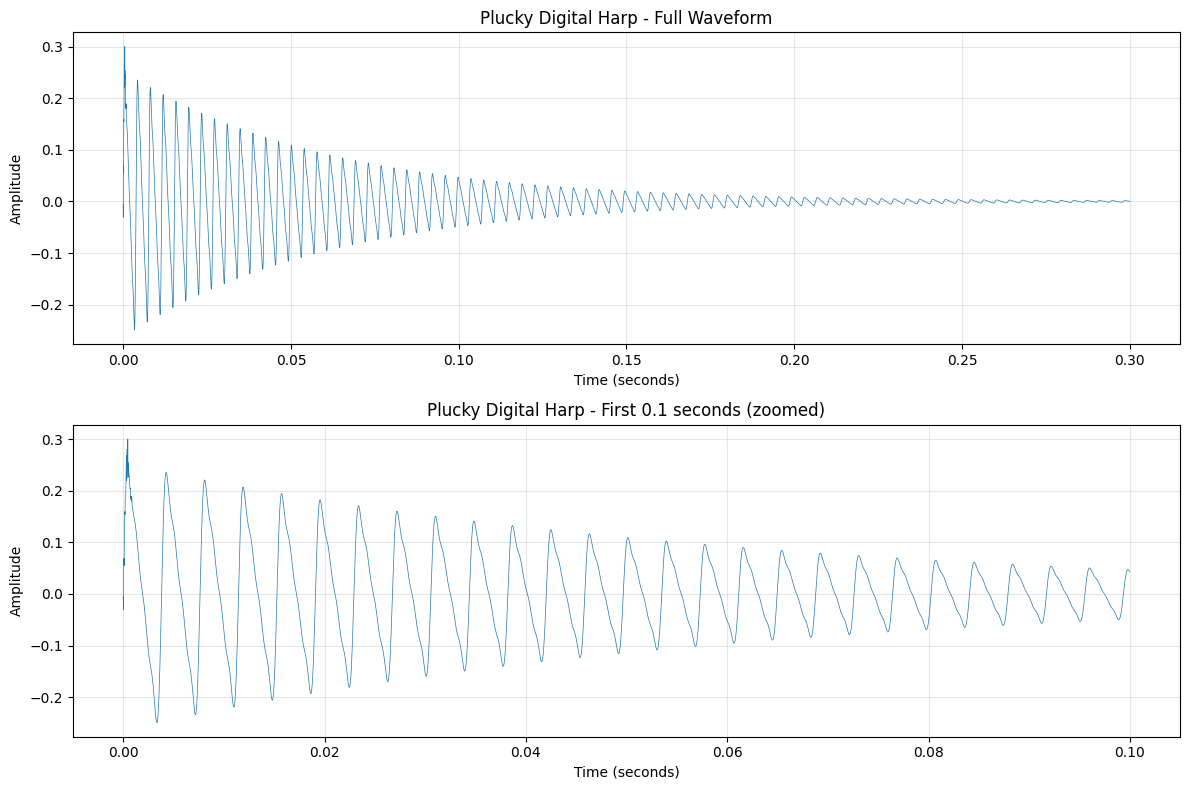

Duration: 0.300 seconds
Sample rate: 44100 Hz
Max amplitude: 0.3000
RMS amplitude: 0.0507


In [26]:
from IPython.display import Audio

# Visualize the waveform
visualize_wave(wave, sample_rate, title="Plucky Digital Harp")

# Play the audio file - this works properly in Jupyter notebooks
Audio("sounds/testtone.wav", autoplay=True)